In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
sales_detail=pd.read_csv("sales_detal.csv")
customer_data=pd.read_csv("customer_data.csv")
sales_summary=pd.read_csv("sales_summary.csv")


In [3]:
non_ids=customer_data[customer_data.isnull().any(axis=1)]['customer_id']

In [4]:
customer_data=customer_data[~customer_data.customer_id.isin(non_ids)]

In [5]:
sales_detail=sales_detail[~sales_detail.customer_id.isin(non_ids)]

In [6]:
sales_summary=sales_summary[~sales_summary.customer_id.isin(non_ids)]

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7530 entries, 0 to 7999
Data columns (total 3 columns):
customer_id    7530 non-null int64
gender         7530 non-null object
birth_year     7530 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 235.3+ KB


In [8]:
sales_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805878 entries, 0 to 843006
Data columns (total 6 columns):
customer_id                 805878 non-null int64
year                        805878 non-null int64
month                       805878 non-null int64
catagory_code               805878 non-null object
total_spent_for_category    805878 non-null float64
end_date                    805878 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 43.0+ MB


In [9]:
sales_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126183 entries, 0 to 132186
Data columns (total 8 columns):
customer_id              126183 non-null int64
year                     126183 non-null int64
month                    126183 non-null int64
weekend_amount_spent     126183 non-null float64
Num_of_weekend_visits    126183 non-null int64
total_amount_spent       126183 non-null float64
total_num_of_visits      126183 non-null int64
end_date                 126183 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 8.7+ MB


In [10]:
len(sales_detail['catagory_code'].unique())

20

In [11]:
df1=sales_detail.groupby(['catagory_code'])['total_spent_for_category'].sum()

In [12]:
customer_data['birth_year']=customer_data['birth_year'].astype(int)

In [13]:
#sorted(customer_data['birth_year'].unique())

In [14]:
customer_data['age']=2020-customer_data['birth_year']

In [15]:
customer_data['age']=customer_data['age'].astype(int)

In [16]:
#sorted(customer_data['age'].unique())

In [17]:
bins=[1930,1946,1964,1976,1995,2010]
labels=['Traditionalists','Boomers','Gen X','Gen Y','Gen Z']
customer_data['agegroup']=pd.cut(customer_data['birth_year'], bins=bins, labels=labels, right=False)
customer_data.head()

,customer_id,gender,birth_year,age,agegroup
0,167939,female,1985,35,Gen Y
1,168055,male,1966,54,Gen X
2,168227,female,1981,39,Gen Y
3,168286,female,1961,59,Boomers
4,168308,female,1970,50,Gen X


In [18]:
df=sales_detail.join(customer_data.set_index('customer_id'), on='customer_id')
df.head()

,customer_id,year,month,catagory_code,total_spent_for_category,end_date,gender,birth_year,age,agegroup
0,337134,2017,6,B117,2226.0,2017-06-30,female,1970,50,Gen X
1,950216,2018,2,B115,1131.0,2018-02-28,male,1997,23,Gen Z
2,824818,2018,2,B115,960.0,2018-02-28,female,1977,43,Gen Y
3,547554,2018,7,B115,345.0,2018-07-31,male,1958,62,Boomers
4,176602,2017,5,B115,217.5,2017-05-31,female,1955,65,Boomers


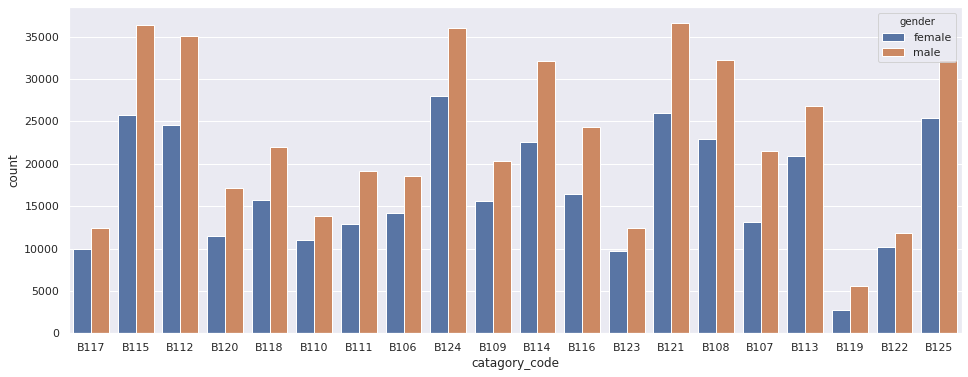

In [19]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="catagory_code", hue="gender", data=df)

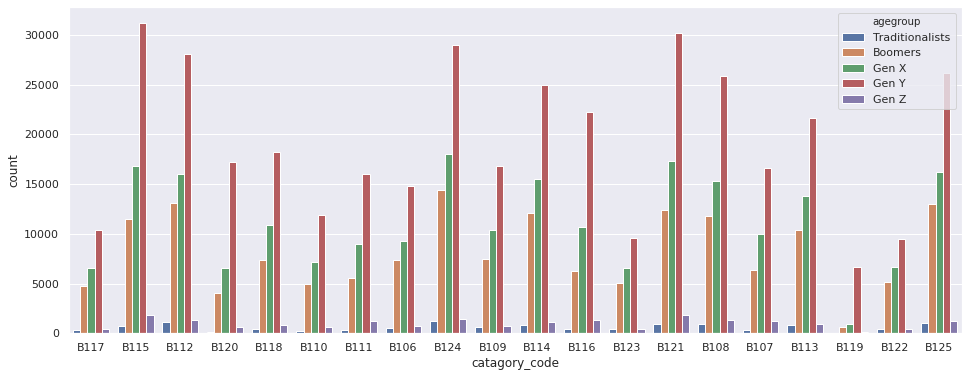

In [20]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="catagory_code", hue="agegroup", data=df)

In [21]:
sales_summary.head()

,customer_id,year,month,weekend_amount_spent,Num_of_weekend_visits,total_amount_spent,total_num_of_visits,end_date
0,519123,2019,4,13385.67,3,23558.22,10,2019/04/30
1,510205,2019,4,21662.76,3,23632.74,4,2019/04/30
2,341451,2019,4,1433.50,1,9450.19,3,2019/04/30
3,264241,2017,12,17391.91,3,32940.57,6,2017/12/31
4,207482,2017,12,10949.23,2,26126.32,7,2017/12/31


In [22]:
sales_summary['basket_value']=sales_summary['total_amount_spent']/sales_summary['total_num_of_visits']
sales_summary['basket_value_weekend']=sales_summary['weekend_amount_spent']/sales_summary['Num_of_weekend_visits']

In [23]:
sales_summary.head()

,customer_id,year,month,weekend_amount_spent,Num_of_weekend_visits,total_amount_spent,total_num_of_visits,end_date,basket_value,basket_value_weekend
0,519123,2019,4,13385.67,3,23558.22,10,2019/04/30,2355.822000,4461.890000
1,510205,2019,4,21662.76,3,23632.74,4,2019/04/30,5908.185000,7220.920000
2,341451,2019,4,1433.50,1,9450.19,3,2019/04/30,3150.063333,1433.500000
3,264241,2017,12,17391.91,3,32940.57,6,2017/12/31,5490.095000,5797.303333
4,207482,2017,12,10949.23,2,26126.32,7,2017/12/31,3732.331429,5474.615000


In [24]:
sales_summary['time']=sales_summary['year'].astype(str)+"-"+sales_summary['month'].astype(str)+"-"+"01"

sales_summary['time']=pd.to_datetime(sales_summary['time'])

basket_mean=sales_summary.groupby(['customer_id'])['basket_value'].mean()
basket_mean=basket_mean.to_frame()

In [25]:
sales_summary.head()

,customer_id,year,month,weekend_amount_spent,Num_of_weekend_visits,total_amount_spent,total_num_of_visits,end_date,basket_value,basket_value_weekend,time
0,519123,2019,4,13385.67,3,23558.22,10,2019/04/30,2355.822000,4461.890000,2019-04-01
1,510205,2019,4,21662.76,3,23632.74,4,2019/04/30,5908.185000,7220.920000,2019-04-01
2,341451,2019,4,1433.50,1,9450.19,3,2019/04/30,3150.063333,1433.500000,2019-04-01
3,264241,2017,12,17391.91,3,32940.57,6,2017/12/31,5490.095000,5797.303333,2017-12-01
4,207482,2017,12,10949.23,2,26126.32,7,2017/12/31,3732.331429,5474.615000,2017-12-01


In [26]:
df1=basket_mean.join(customer_data.set_index('customer_id'), on='customer_id')

In [27]:
df2=sales_summary.reset_index().pivot('customer_id', 'time', 'basket_value')
df2 = df2.reindex(sorted(df2.columns), axis=1)
df2 = df2.fillna(0)
df2.head()

time,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,...,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
customer_id,,,,,,,,,,,,,,,,,,,,,
167939,907.325000,567.968000,286.824286,1114.048000,2503.794,2804.7125,4097.1775,700.043333,2687.060000,2081.173333,...,1247.70000,3254.856667,1992.483333,1686.888571,1848.048571,1595.044286,3701.937500,2815.052381,2263.692667,685.160667
168055,0.000000,0.000000,0.000000,1259.000000,0.000,0.0000,482.5000,1406.650000,0.000000,0.000000,...,0.00000,3595.190000,0.000000,0.000000,366.170000,0.000000,677.590000,0.000000,0.000000,0.000000
168227,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.0000,2537.500000,0.000000,0.000000,...,0.00000,0.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.770000
168286,709.731667,525.324286,931.153333,1443.133333,1077.920,1412.7800,1663.2300,1098.077500,1343.441667,746.347000,...,871.42375,783.858235,772.198667,917.365000,1217.467692,1405.155000,1075.487857,838.894286,1262.455000,1052.893333
168308,0.000000,0.000000,1201.365000,1474.863333,0.000,0.0000,280.5400,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
df2 = df2.sort_values(by ='customer_id')
df1 = df1.sort_values(by ='customer_id')

In [29]:
result = pd.concat([df1, df2], axis=1, join='inner')
result.head()

,basket_value,gender,birth_year,age,agegroup,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,...,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
customer_id,,,,,,,,,,,,,,,,,,,,,
167939,2289.815391,female,1985,35,Gen Y,907.325000,567.968000,286.824286,1114.048000,2503.794,...,1247.70000,3254.856667,1992.483333,1686.888571,1848.048571,1595.044286,3701.937500,2815.052381,2263.692667,685.160667
168055,1312.378824,male,1966,54,Gen X,0.000000,0.000000,0.000000,1259.000000,0.000,...,0.00000,3595.190000,0.000000,0.000000,366.170000,0.000000,677.590000,0.000000,0.000000,0.000000
168227,1787.567500,female,1981,39,Gen Y,0.000000,0.000000,0.000000,0.000000,0.000,...,0.00000,0.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.770000
168286,1034.212813,female,1961,59,Boomers,709.731667,525.324286,931.153333,1443.133333,1077.920,...,871.42375,783.858235,772.198667,917.365000,1217.467692,1405.155000,1075.487857,838.894286,1262.455000,1052.893333
168308,1897.362083,female,1970,50,Gen X,0.000000,0.000000,1201.365000,1474.863333,0.000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
#adding flag to df2
rows, columns = df2.shape
flagList = []
for i in range(rows):
    count = 0
    for j in range(columns-2):
        if df2.iloc[i][j] == 0:
            continue
        elif ((df2.iloc[i][j+1]==0) and (df2.iloc[i][j+2]==0)):
            count += 1
    flagList.append(count)

In [31]:
a_series = pd.Series(flagList)
df2['flag'] = a_series.values
df2.head()

time,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,...,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,flag
customer_id,,,,,,,,,,,,,,,,,,,,,
167939,907.325000,567.968000,286.824286,1114.048000,2503.794,2804.7125,4097.1775,700.043333,2687.060000,2081.173333,...,3254.856667,1992.483333,1686.888571,1848.048571,1595.044286,3701.937500,2815.052381,2263.692667,685.160667,0
168055,0.000000,0.000000,0.000000,1259.000000,0.000,0.0000,482.5000,1406.650000,0.000000,0.000000,...,3595.190000,0.000000,0.000000,366.170000,0.000000,677.590000,0.000000,0.000000,0.000000,5
168227,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.0000,2537.500000,0.000000,0.000000,...,0.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.770000,3
168286,709.731667,525.324286,931.153333,1443.133333,1077.920,1412.7800,1663.2300,1098.077500,1343.441667,746.347000,...,783.858235,772.198667,917.365000,1217.467692,1405.155000,1075.487857,838.894286,1262.455000,1052.893333,0
168308,0.000000,0.000000,1201.365000,1474.863333,0.000,0.0000,280.5400,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3


In [32]:
frq = []
for i in range(rows):
    temp = 0
    temp_count = 0
    for j in range(columns):
        if temp == 0:
            if df2.iloc[i][j]!=0:
                temp = 1
            else:
                continue
        else:
            if df2.iloc[i][j]!=0:
                temp_count += 1
    frq.append(temp_count)

In [33]:
fr = pd.Series(frq)
df2['frequency'] = fr.values
df2.head()

time,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,flag,frequency
customer_id,,,,,,,,,,,,,,,,,,,,,
167939,907.325000,567.968000,286.824286,1114.048000,2503.794,2804.7125,4097.1775,700.043333,2687.060000,2081.173333,...,1992.483333,1686.888571,1848.048571,1595.044286,3701.937500,2815.052381,2263.692667,685.160667,0,35
168055,0.000000,0.000000,0.000000,1259.000000,0.000,0.0000,482.5000,1406.650000,0.000000,0.000000,...,0.000000,0.000000,366.170000,0.000000,677.590000,0.000000,0.000000,0.000000,5,16
168227,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.0000,2537.500000,0.000000,0.000000,...,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.770000,3,3
168286,709.731667,525.324286,931.153333,1443.133333,1077.920,1412.7800,1663.2300,1098.077500,1343.441667,746.347000,...,772.198667,917.365000,1217.467692,1405.155000,1075.487857,838.894286,1262.455000,1052.893333,0,35
168308,0.000000,0.000000,1201.365000,1474.863333,0.000,0.0000,280.5400,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,3


In [37]:
labeldata=df2[["flag","frequency"]]
from sklearn import preprocessing
labelEncoder=preprocessing.LabelEncoder()
X_2=labeldata.apply(labelEncoder.fit_transform)

df2['flag']=X_2['flag']
df2['frequency']=X_2['frequency']
res=df2[['flag','frequency']]

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
 n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
 random_state=None, tol=0.0001, verbose=0)
y=kmeans.fit_predict(res)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.95511222 28.21633416]
 [ 2.45071726  6.50971772]]


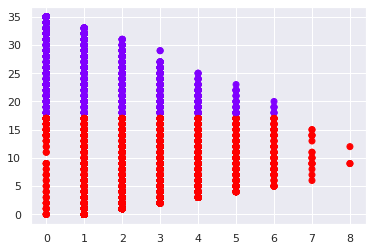

In [52]:
plt.scatter(res['flag'], res['frequency'],c=y,cmap='rainbow')

In [54]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [34]:
sample_submition = pd.read_csv("sample_submission.csv")

In [35]:
sample_ids=sample_submition[sample_submition.isnull().any(axis=1)]['customer_id']

In [0]:
sample_data=sample_submition[~sample_submition.customer_id.isin(sample_ids)]

In [0]:
sample_data.info()

In [0]:
sample_data.head()

In [0]:
for i in sample_ids:
  frequency_2017 = 0
  for j in range (8,16):
    frequency_2017 = frequency_2017 + result.loc[result['customer_id'== i],:]
  sample_data['prob'] = frequency_2017 


In [0]:
sample_data.head()

In [0]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
 
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

print (getIndexes(sample_data,422234))